In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
eff_train = pd.read_csv('data/eff_train/eff_train1.csv',delimiter=';')
values = [float(v.replace(',','.')) for v in eff_train['value']]
eff_train['value'] = values
eff_train.head()

,tag,timestamp,value,quality
0,Efficiency,01.10.2016 0:00,16137.70,Good
1,Efficiency,01.10.2016 0:00,16060.55,Good
2,Efficiency,01.10.2016 0:00,16633.79,Good
3,Efficiency,01.10.2016 0:00,17578.13,Good
4,Efficiency,01.10.2016 0:00,17331.05,Good


In [39]:
print(len(eff_train))
print(len(eff_train[eff_train['quality'] == 'Good']))

535666
535665


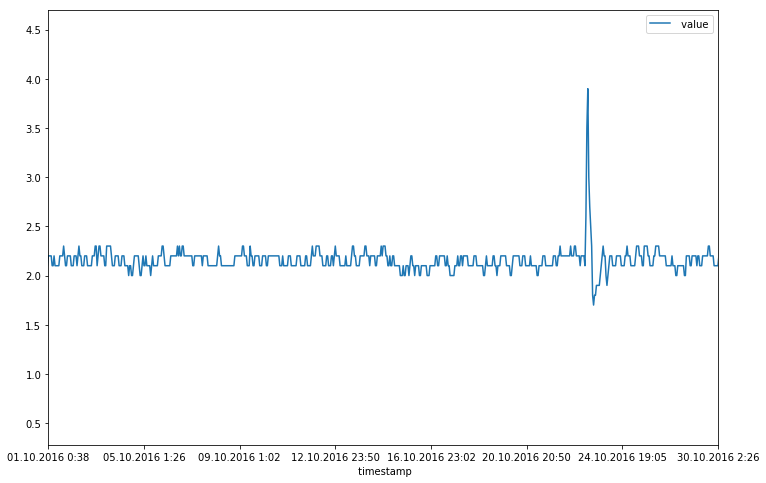

In [142]:
# qual_train = pd.read_csv('data/qual_train/qual_train1.csv',delimiter=';')
# values = [float(v.replace(',','.')) for v in qual_train[' value']]
# qual_train[' value'] = values
# print(qual_train.head())
qual_train[qual_train[' quality'] == 'Good'].plot(x=' timestamp',y=' value',figsize=(12,8))
plt.xlim(100,800)
plt.show()

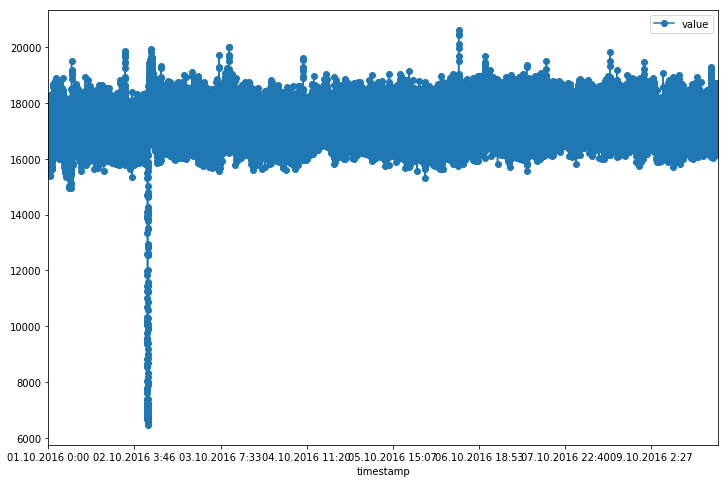

In [175]:
eff_train[eff_train['timestamp'] < '10-10-2016'].plot('timestamp','value',marker='o',figsize=(12,8))
# plt.ylim((15000,2000))
plt.show()

In [27]:
qual_train = pd.read_csv('data/qual_train/qual_train1.csv',delimiter=';')
qual_train.head()

,tag,timestamp,value,quality
0,Quality,01.10.2016 0:38,"2,2",Good
1,Quality,01.10.2016 1:02,"2,2",Good
2,Quality,01.10.2016 1:26,"2,3",Good
3,Quality,01.10.2016 1:50,"2,2",Good
4,Quality,01.10.2016 2:14,"2,2",Good


In [28]:
qual_train = pd.read_csv('data/energy_cons_train/energy_cons_train1.csv',delimiter=';')
qual_train.head()

,tag,timestamp,value,quality
0,Energy_cons,01.10.2016 0:01,"20,347508",Good
1,Energy_cons,01.10.2016 0:02,"20,24238",Good
2,Energy_cons,01.10.2016 0:03,"20,208391",Good
3,Energy_cons,01.10.2016 0:04,"20,239189",Good
4,Energy_cons,01.10.2016 0:05,"20,262808",Good


In [124]:
def tofloat(v):
    while True:
        p = v.find(',')
        if v[p+1:].find(',') < 0:
            break
        v = v[p+1:]
    return float(v.replace(',','.'))
    
cons = pd.DataFrame()
for i in range(1,11):
    print(i)
    df = pd.read_csv('data/energy_cons_train/Energy_cons_train' + str(i) +'.csv',delimiter=';')
    values = [tofloat(v) for v in df[' value'].values]
    df[' value'] = values
    cons = cons.append(df)
    
print(len(cons))
mean_good = cons[cons[' quality'] == 'Good'][' value'].mean()
cons[' value'][cons[' quality'] != 'Good'] = mean_good
# print(len(id_bad))
print(len(cons))

1
2
3
4
5
6
7
8
9
10
434205
434205


In [ ]:
cons.plot(x=' timestamp',y=' value','o',figsize=(15,10))

In [95]:
import fbprophet
fbprophet.forecaster

In [122]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

In [132]:

sum(df['y'] == - np.inf)

0

In [135]:
df = pd.DataFrame()
df['y'] = np.log(cons[' value'])
df['y'][df['y'] == -np.inf] = mean_good
df['ds'] = cons[' timestamp']
df.head()
m = Prophet()
m.fit(df)

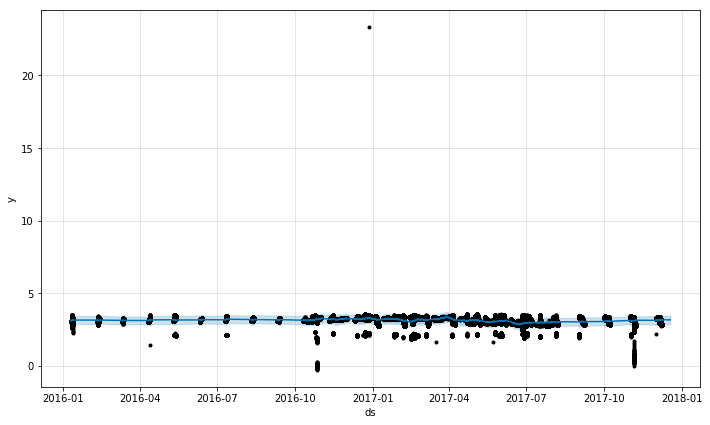

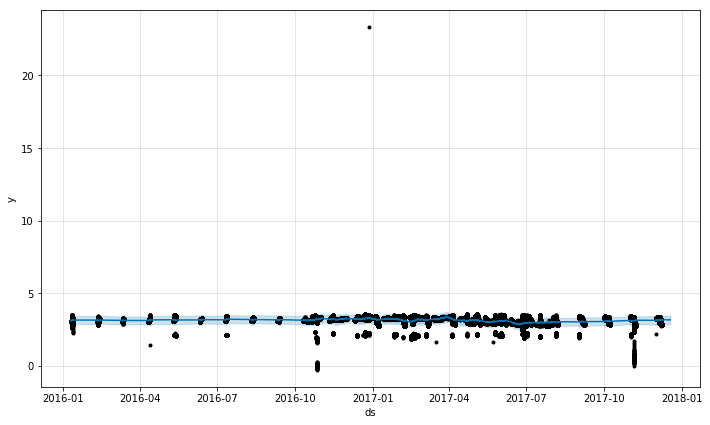

In [176]:
future = m.make_future_dataframe(periods=10)
forecast = m.predict(future)
m.plot(forecast)

In [30]:
%%time 
ts = eff_train['value'][:3000]
length = 60
train_bound = int(ts.shape[0] * 0.75)
y_train = np.round(np.random.random(size= train_bound - length))
y_test = np.round(np.random.random(size= ts.shape[0] - train_bound - length))
# print(ts[:train_bound].shape[0]  - 60)
print(y_test.shape)
model = LogisticRegression()
roc = process(model, ts[:train_bound], y_train, ts[train_bound:],y_test,length=length)
# print(roc)
print(roc)

(690,)
here
shapes
(2190, 60) (2190,)
0.513230091842
CPU times: user 283 ms, sys: 8.44 ms, total: 291 ms
Wall time: 289 ms


(2000,)


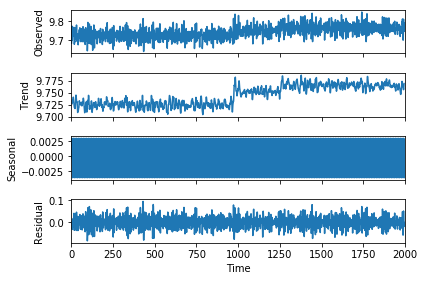

In [123]:
trend = res.trend
season = res.seasonal
nans = np.isnan(trend)
trend[nans] = np.nanmean(trend)
nans = np.isnan(season)
season[nans] = np.nanmean(season)
observed = res.observed

In [131]:
from importlib import reload
reload(ad)

<module 'gaussian_mixture_anomaly_detection' from '/Users/alex/Desktop/SIBURGlobalChangers/gaussian_mixture_anomaly_detection.py'>

In [132]:
frame = np.concatenate([[trend],[season]],axis=0).T

In [139]:
%%time
import gaussian_mixture_anomaly_detection as ad
# frame = eff_train[['value']].iloc[:443520]
frame = pd.DataFrame(data=frame, columns=['trend','season'])
print(frame.shape)
T = 2000
# print(T * (535666//T))
targets = ad.extract_anomaly_target(frame,frame_period=T,halflife=200,horizont = 100,top=0.0005)

(2000, 2)
Start probabilities memorization

/Users/alex/anaconda/lib/python3.5/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/alex/Desktop/SIBURGlobalChangers/gaussian_mixture_anomaly_detection.py:174: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(adjust=True,min_periods=0,ignore_na=False,com=200).mean()
  def find_anomalies(self, scores, strategy='sample', anomaly_top=0.01, log_likelihood_threshold=None):



CPU times: user 1min 25s, sys: 1.13 s, total: 1min 26s
Wall time: 1min 28s


200


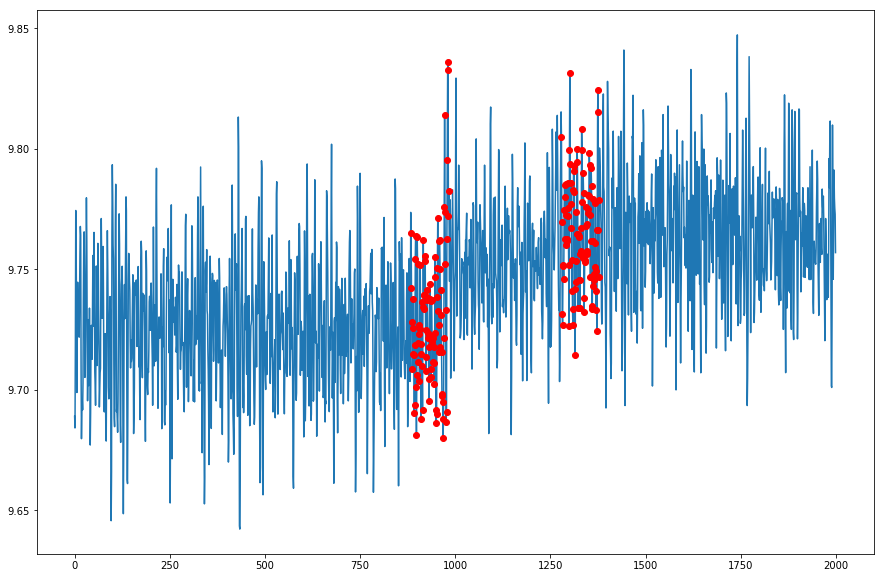

In [140]:
plt.figure(figsize=(15,10))
plt.plot(range(2000),observed)
X = np.arange(2000)
Y = trend
indices = [i for i in range(len(targets)) if targets[i]==1]
print(len(indices))
plt.plot(X[indices],observed[indices],'o',color='red')
# plt.xlim(0,500)

plt.show()

200


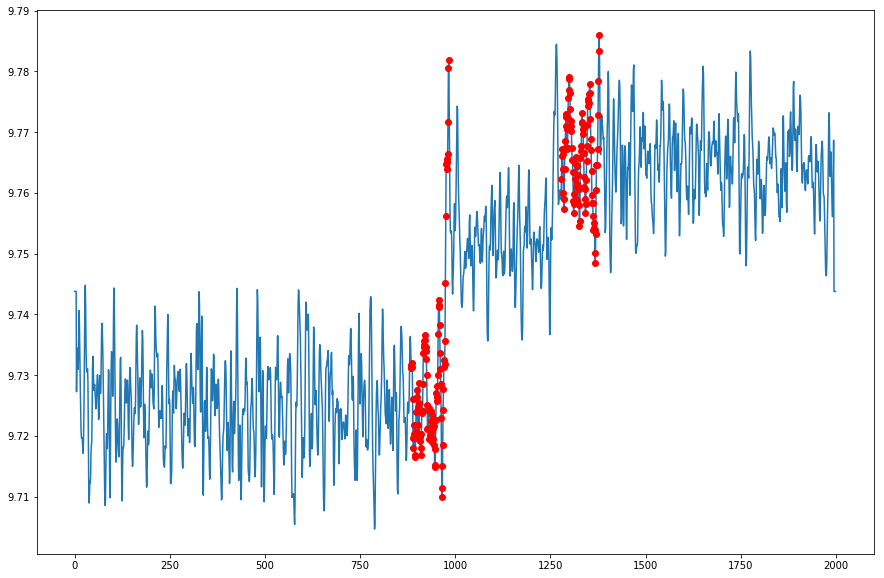

In [141]:
plt.figure(figsize=(15,10))
plt.plot(range(2000),trend)
X = np.arange(2000)
Y = trend
indices = [i for i in range(len(targets)) if targets[i]==1]
print(len(indices))
plt.plot(X[indices],trend[indices],'o',color='red')
# plt.xlim(0,500)

plt.show()

In [323]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split

def generate_x(ts, start_pos, length):
    return np.array(ts[start_pos:start_pos + length])

def process(model, ts, y, length=2 * 60 * 60):
    X = []
    print('here')
    for pos in range(len(ts) - length):
        X.append(generate_x(ts, pos, length))
        
    X = np.array(X)

    plot_with_target(ts,y)
    train_size = int(len(X) * 0.75)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    model.fit(X_train, y_train)
    
    train_proba = model.predict_proba(X_train)[:,1]
    test_proba = model.predict_proba(X_test)[:,1]

    roc_auc_test = roc_auc_score(y_score=test_proba, y_true=y_test)
    roc_auc_train = roc_auc_score(y_score=train_proba, y_true=y_train)
    
    return roc_auc_test, roc_auc_train

In [324]:
import statsmodels.api as sm
import gaussian_mixture_anomaly_detection as ad
reload(ad)
def get_targets(trend,season,diff,T=None,horizont=66,top=0.0005):
    if T is None:
        T = trend.shape[0]
    data = np.concatenate([[trend],[season],[diff]],axis=0).T
    frame = pd.DataFrame(data=data, columns=['trend','season','diff'])
    print(frame.shape)
    targets = ad.extract_anomaly_target(frame,frame_period=T,halflife=200,horizont=horizont,top=top)
    return targets

def get_dropped(ts, lag=10):
    return np.array([ts[i*lag] for i in range(len(ts)//lag)])
    
def get_expanded_features(ts, freq=10):
    ts = np.log(ts)
    res = sm.tsa.seasonal_decompose(ts, freq=freq)
    res_dict = dict()
    trend = res.trend
    season = res.seasonal
    nans = np.isnan(trend)
    trend[nans] = np.nanmean(trend)
    nans = np.isnan(season)
    season[nans] = np.nanmean(season)
    observed = res.observed
    res_dict = {
                'trend':trend, 
                'season':season, 
                'observed':observed,
                'd1_trend':np.concatenate([[0.0], np.diff(trend)])
               }
    
    return res_dict
def plot_with_target(ts, target):
    plt.figure(figsize=(15,10))
    X = np.arange(len(ts))
    Y = ts
    indices = [i for i in range(len(targets)) if targets[i]==1]
    plt.plot(X,Y)
    plt.plot(X[indices],Y[indices],'o',color='red')
    plt.show()

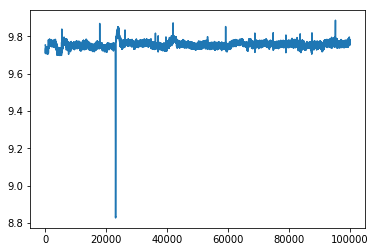

(10000,)


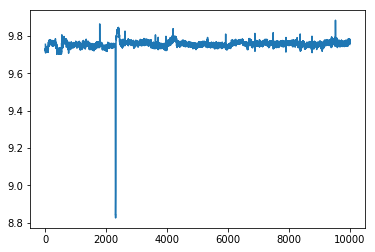

In [272]:
origin_ts = eff_train['value'][:100000].values
res = get_expanded_features(origin_ts)
plt.plot(range(len(res['trend'])), res['trend'])
plt.show()
lag=10
trend_dropped = get_dropped(res['trend'],lag)
season_dropped = get_dropped(res['season'],lag)
diff_dropped = get_dropped(res['d1_trend'],lag)
observed_dropped = get_dropped(res['observed'],lag)
print(trend_dropped.shape)
plt.plot(range(len(trend_dropped)), trend_dropped)
plt.show()

In [273]:
%%time
targets = get_targets(trend_dropped,season_dropped,diff_dropped,top=0.001 * lag)

(10000, 3)
Start probabilities memorization

/Users/alex/anaconda/lib/python3.5/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
100%|██████████| 1/1 [00:08<00:00,  8.19s/it]
/Users/alex/Desktop/SIBURGlobalChangers/gaussian_mixture_anomaly_detection.py:172: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(adjust=True,min_periods=0,ignore_na=False,com=200).mean()
  


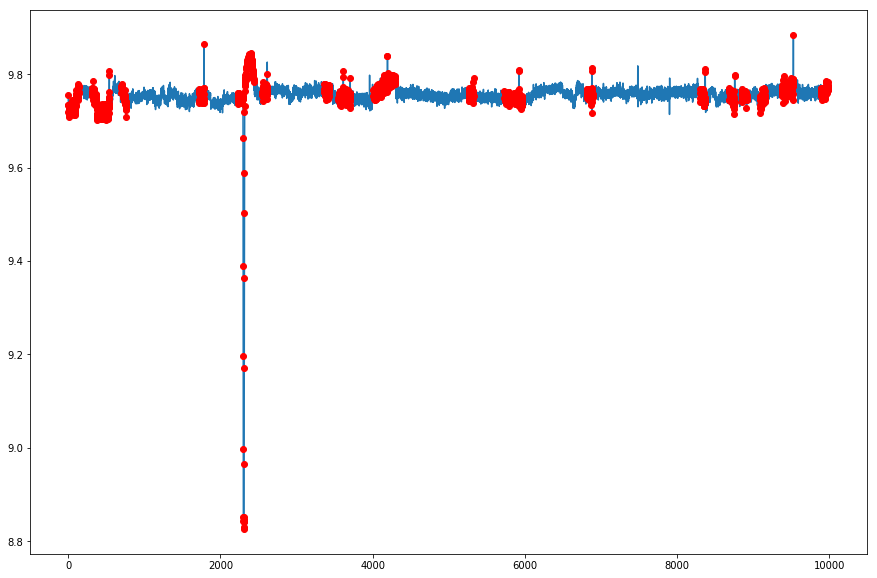

In [274]:
plot_with_target(trend_dropped, targets)
# print(targets)

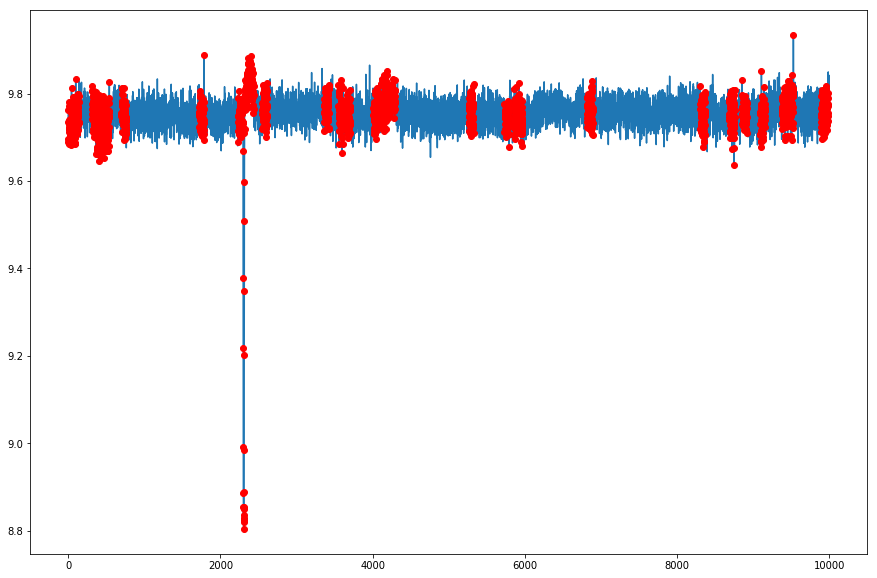

In [275]:
plot_with_target(observed_dropped, targets)

(9900,)
here


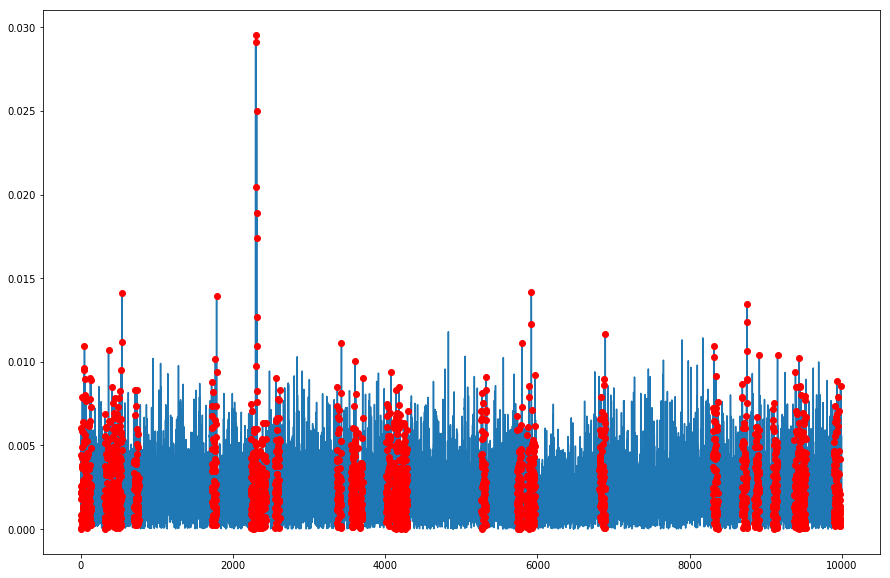

(0.61123549085185913, 0.67469144522775626)

In [332]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
length = 100
y = targets[length:]
print(y.shape)
roc = process(model, np.abs(diff_dropped), y, length=length)
roc

(9900,)
here


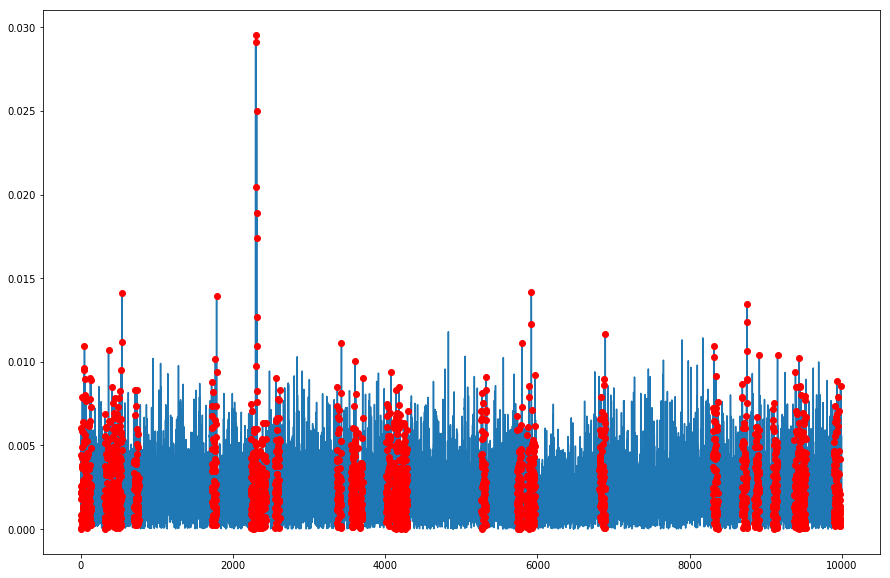

(0.6151662404092072, 0.85446475824857004)

In [331]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=800,max_depth=5)
length = 100
y = targets[length:]
print(y.shape)
roc = process(model, np.abs(diff_dropped), y, length=length)
roc